# K-Nearest Neighbours

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import json

### Load the Training, Testing and Evaluation Data

In [4]:
# Load the data
X_train = pd.read_pickle('model/X_train.pkl')
y_train = pd.read_pickle('model/y_train.pkl')
X_test = pd.read_pickle('model/X_test.pkl')
y_test = pd.read_pickle('model/y_test.pkl')
X_recommend = pd.read_pickle('model/X_recommend.pkl')

In [5]:
X_train.head()

,popularity,explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,...,urban contemporary,vallenato,vapor trap,vapor twitch,video game music,viral pop,viral rap,weirdcore,west coast rap,yacht rock
1213,4,False,220653,0.780,0.856,10,-5.316,0,0.0405,0.11600,...,0,0,0,0,0,0,0,0,0,0
71,84,False,173333,0.726,0.431,8,-8.765,0,0.1350,0.73100,...,0,0,0,0,0,0,0,0,0,0
1058,0,False,182506,0.791,0.907,0,-2.223,1,0.0884,0.01320,...,0,0,0,0,0,0,0,0,0,0
756,77,True,205158,0.533,0.858,2,-4.212,1,0.0766,0.00021,...,0,0,0,0,0,0,0,0,0,0
317,62,False,109735,0.670,0.609,7,-10.088,1,0.0333,0.74900,...,0,0,0,0,0,0,0,0,0,0


### Normalize the Data with Min-Max Normalization

Since K-Nearest Neighbours is a distance based algorithm which is sensitive to range of features. Features that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus all input features are normalized to the range [0,1]

In [6]:
# Normalize features to [0,1]
minmax_scaler = MinMaxScaler()
X_train = pd.DataFrame(minmax_scaler.fit_transform(X_train), columns=X_train.columns)

In [7]:
X_train.head()

,popularity,explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,...,urban contemporary,vallenato,vapor trap,vapor twitch,video game music,viral pop,viral rap,weirdcore,west coast rap,yacht rock
0,0.04,0.0,0.231421,0.779343,0.861018,0.909091,0.863779,0.0,0.032470,0.116815,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.84,0.0,0.163324,0.715962,0.429870,0.727273,0.748513,0.0,0.209835,0.736152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.0,0.176525,0.792254,0.912756,0.000000,0.967148,1.0,0.122372,0.013290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.77,1.0,0.209123,0.489437,0.863047,0.181818,0.900675,1.0,0.100225,0.000208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.62,0.0,0.071802,0.650235,0.610445,0.636364,0.704298,1.0,0.018956,0.754279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Hyperparameter Tuning
We will tune for:
- Number of neighbours (n_neighbors)
- Leaf size (leaf_size)
- Power parameter (p)

In [8]:
# Check accuracy for each value for each hyperparameter in its range
# We will use GridSearchCV to automate this process

n_neighbors = list(range(1,30))
leaf_size = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

print(hyperparameters)

{'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'p': [1, 2]}


In [9]:
# estimator = ML model to be tested
# param_grid = dictionary of hyperparameters to be tested
# n_jobs = number of cores to be used in parallel, -1 means use all
# cv = number of cross validation set elements
# verbose = setting it to 2 will print updates to the terminal

best_model = GridSearchCV(estimator=KNeighborsClassifier(),
                         param_grid=hyperparameters,
                         n_jobs=-1,
                         cv=10,
                         verbose=2)

# Fit the model
best_model = best_model.fit(X_train,y_train)

Fitting 10 folds for each of 1682 candidates, totalling 16820 fits


In [11]:
n_neighbors = best_model.best_estimator_.get_params()['n_neighbors']
leaf_size = best_model.best_estimator_.get_params()['leaf_size']
p = best_model.best_estimator_.get_params()['p']

print(f'Best n_neighbors: {n_neighbors}')
print(f'Best leaf_size: {leaf_size}')
print(f'Best p: {p}')

Best n_neighbors: 4
Best leaf_size: 1
Best p: 1


### Model

In [12]:
# model
k_nearest_neighbours = KNeighborsClassifier(n_neighbors=n_neighbors,
                                           leaf_size=leaf_size,
                                           p=p)

# fit the model
k_nearest_neighbours.fit(X_train, y_train)

# prediction
predictions = k_nearest_neighbours.predict(X_test)

### Visualizing the Confusion Matrix

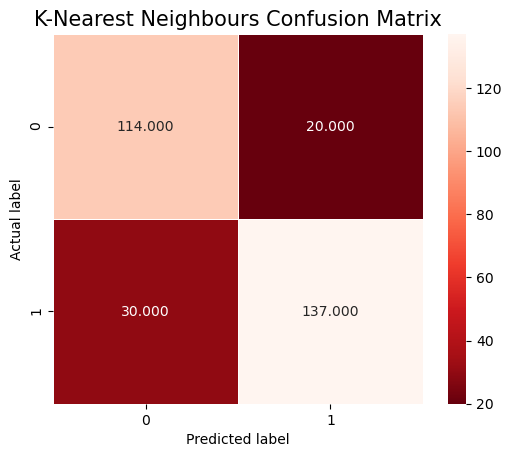

In [13]:
cm = confusion_matrix(y_test, predictions)
plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('K-Nearest Neighbours Confusion Matrix', size = 15);
plt.show()

### Results

In [14]:
precision_macro_average = precision_score(y_test, predictions, average='macro')
precision_weighted_average = precision_score(y_test, predictions, average='weighted')

recall_macro_average = recall_score(y_test, predictions, average='macro')
recall_weighted_average = recall_score(y_test, predictions, average='weighted')

f1_macro_average = f1_score(y_test, predictions, average='macro')
f1_weighted_average = f1_score(y_test, predictions, average='weighted')


print(f'Precision (macro average)--> {round(precision_macro_average*100, 2)}%')
print(f'Precision (weighted average)--> {round(precision_weighted_average*100, 2)}%')

print(f'Recall (macro average)--> {round(recall_macro_average*100, 2)}%')
print(f'Recall (weighted average)--> {round(recall_weighted_average*100, 2)}%')

print(f'F1 score (macro average)--> {round(f1_macro_average*100, 2)}%')
print(f'F1 score (weighted average)--> {round(f1_weighted_average*100, 2)}%')

Precision (macro average)--> 83.21%
Precision (weighted average)--> 83.66%
Recall (macro average)--> 83.56%
Recall (weighted average)--> 83.39%
F1 score (macro average)--> 83.29%
F1 score (weighted average)--> 83.43%


In [15]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       134
           1       0.87      0.82      0.85       167

    accuracy                           0.83       301
   macro avg       0.83      0.84      0.83       301
weighted avg       0.84      0.83      0.83       301



#### This model was good

In [16]:
# Serialize f1 scores into a json file for later comparison between all models
model_name = "k_nearest_neighbours"
entry = {"f1_macro_average":f1_macro_average, "f1_weighted_average":f1_weighted_average}


with open("f1_scores.json", "r") as file:
    data = json.load(file)
data[model_name] = entry
with open("f1_scores.json", "w") as file:
    json.dump(data, file, indent=4)